TASK 3

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCl Machine Learning Repository.

Using a Decision Tree Classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Here's how the process works:

1. Data Preparation
    Features (X): This represents the demographic and behavioral data of customers, such as age, job, marital status, education, etc.
    Target (y): This is the outcome we're trying to predict, i.e., whether a customer will purchase a product or service (often labeled as yes or no).

2. Training the Decision Tree
    The dataset is split into a training set (used to build the model) and a testing set (used to evaluate the model's performance).
    The Decision Tree Classifier is trained on the training set. The algorithm learns patterns in the data by finding splits in the feature space that      best separate the different target outcomes (yes or no).
   
4. Prediction Process
    For a new customer, the decision tree uses their data (age, job, marital status, etc.) to make a series of decisions :
   Root Node: The tree starts at the root node, where it looks at a specific feature (e.g., age).
    Splitting: Based on the feature value (e.g., whether the age is greater than 30), the tree splits and moves to the next node. Each node represents      a decision point that further narrows down the prediction.
    Leaf Node: Eventually, the tree reaches a leaf node, where a final prediction is made—whether the customer is likely to purchase the product (yes)      or not (no).
   
5. Model Evaluation
    After training, the model is tested on the testing set. The predicted outcomes for the customers in the testing set are compared to the actual          outcomes to calculate metrics like accuracy.
    The confusion matrix and classification report provide insights into how well the model is performing, indicating how many correct and incorrect        predictions were made.

In [5]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 



{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [2]:
X.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Convert categorical variables to dummy variables (one-hot encoding)
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)


In [10]:
# Initialize the Decision Tree Classifier
import matplotlib.pyplot as plt
from sklearn import tree
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

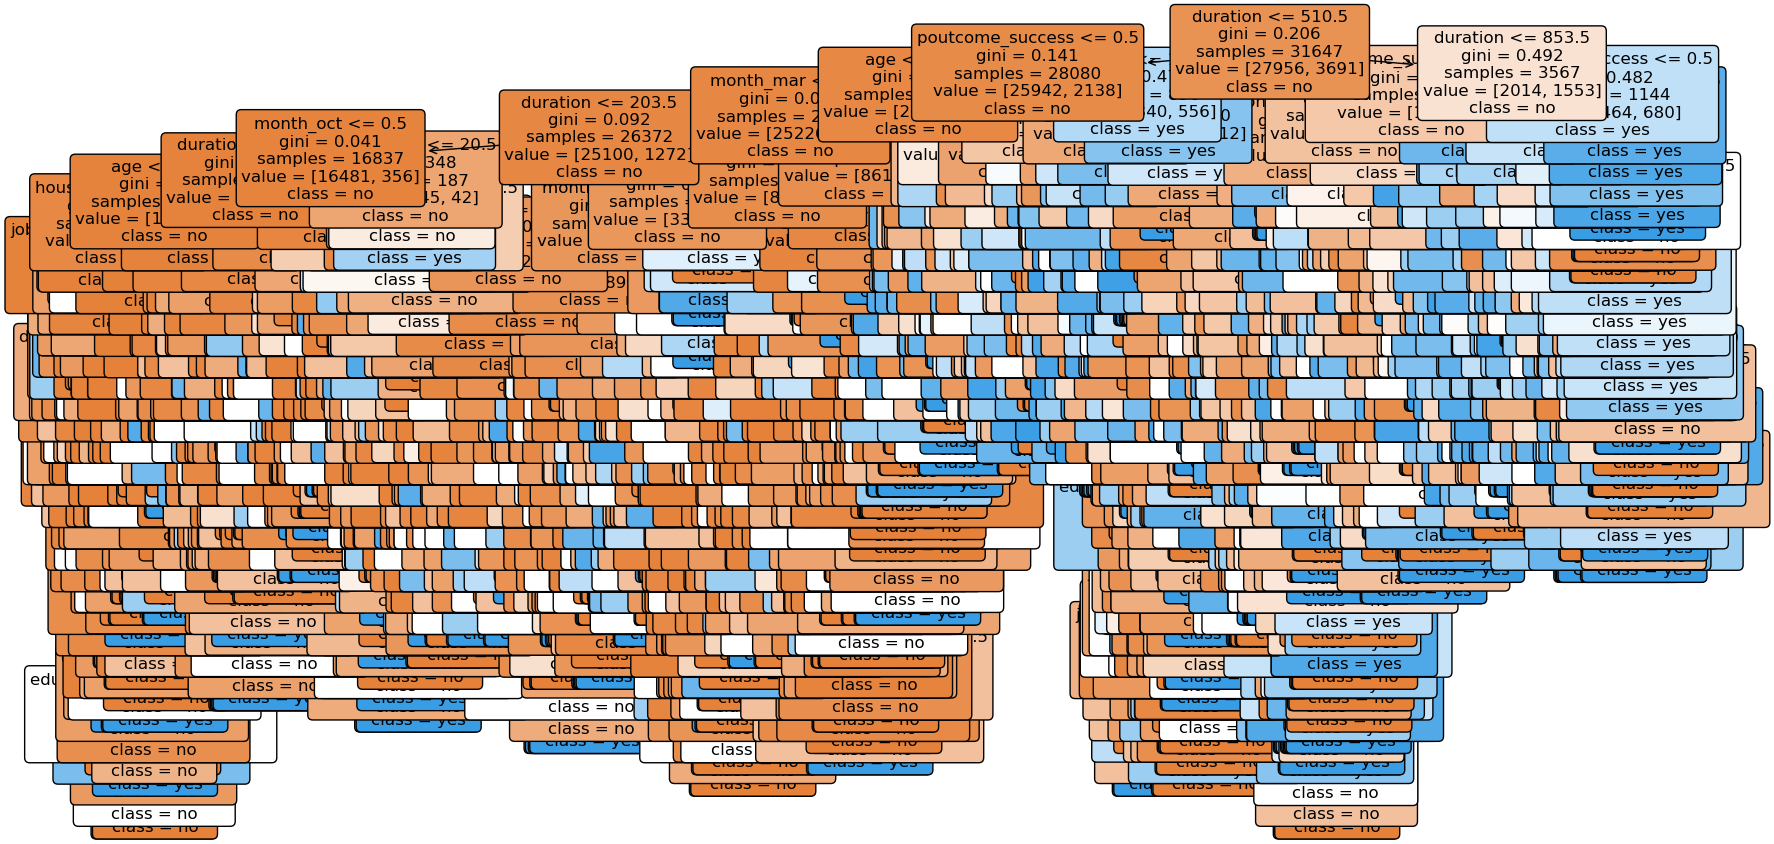

In [15]:
# Visualize the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree

# Convert y to a Series if it's a DataFrame
if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0]  # Extract the first column as a Series

# Set the figure size for better readability
plt.figure(figsize=(20,10))

# Plot the decision tree
tree.plot_tree(clf, filled=True, feature_names=X_encoded.columns, class_names=y.unique(), rounded=True, fontsize=12)

# Show the plot
plt.show()


In [14]:
# Predict the target variable on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 86.94%
Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.92      0.93     11966
         yes       0.45      0.46      0.45      1598

    accuracy                           0.87     13564
   macro avg       0.69      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564

Confusion Matrix:
[[11057   909]
 [  862   736]]


Inference from the Decision Tree Model's Performance
Overall Accuracy (86.94%):

The model is correctly predicting whether a customer will purchase a product or service approximately 87% of the time. This suggests that the model has a good overall performance in classifying customers, but accuracy alone does not tell the whole story.
Class Imbalance:

There is a noticeable imbalance between the "no" (11,966 samples) and "yes" (1,598 samples) classes. This imbalance likely affects the model's performance, particularly in predicting the minority class ("yes").
Precision, Recall, and F1-Score:

For the "no" class:

Precision (0.93): Of all the customers predicted as "no purchase," 93% were correctly classified.
Recall (0.92): The model correctly identified 92% of all actual "no purchase" customers.
F1-Score (0.93): This high F1-score indicates a strong balance between precision and recall for the "no" class, meaning the model is highly effective in predicting when a customer will not purchase.
For the "yes" class:

Precision (0.45): Of all customers predicted as "yes purchase," only 45% were correctly classified. This low precision indicates that the model has a high rate of false positives (incorrectly predicting "yes" when the true label is "no").
Recall (0.46): The model correctly identified 46% of all actual "yes purchase" customers, meaning it is missing more than half of the customers who actually made a purchase.
F1-Score (0.45): The low F1-score reflects the model's struggles in accurately predicting the minority class ("yes"), indicating room for improvement.
Confusion Matrix:

True Negatives (11,057): The model correctly predicted 11,057 customers who did not purchase.
False Positives (909): 909 customers were incorrectly predicted as purchasers.
False Negatives (862): 862 customers who actually purchased were incorrectly predicted as non-purchasers.
True Positives (736): The model correctly predicted 736 customers who did purchase.